# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Jacopo De Stefani - __[Jacopo.De.Stefani@ulb.ac.be](mailto:Jacopo.De.Stefani@ulb.ac.be)__
### Théo Verhelst - __[Theo.Verhelst@ulb.ac.be](mailto:Theo.Verhelst@ulb.ac.be)__
### Gianluca Bontempi - __[gbonte@ulb.ac.be](mailto:gbonte@ulb.ac.be)__

## TP 4 - Predictions: Network-based methods

####  March 30,2021

#### Materials originally developed by *Bertrand Lebichot, Jacopo De Stefani and Gianluca Bontempi*

## Preliminaries

### Supervised learning

The process of supervised learning involves the presence of an entity (the learner, also called prediction model), whose goal is to learn the mapping between inputs and outputs in a given problem.

A supervised learning problem can formulated as follows:

\begin{equation*}
 y = m(\mathbf{x})  
\end{equation*}

where:
- $y$ represents the output variable (also called target)
- $\mathbf{x}$ represents the vector of inputs (also called features).
- $m$ is the (unknown) mapping between input and outputs.

In the majority of the supervised learning problems, the mapping $m$ between input and outputs is unknown and needs to be estimated on basis of the available input/output observation pairs $(\mathbf{x}_i,y_i)$.

## Classification vs regression

Both classification and regression are sub-fields of *supervised learning*. In the two cases, we have predictive variables $\mathbf{x}$ and a target variable $y$. 
The main difference betweet the two type of problems is the type of the target variabile:

- In classification, $y$ is a discrete variable; i.e $y \in \{C_1,\cdots,C_k\}$
- In regression, $y$ is a continuous variable; i.e $y \in \mathbb{R}$

In this practical, in order to better understand the classification process, we will tackle the simplest classification case, with $k=2$ possible output classes (called binary classification).

The goal of our approach is to be able to learn the mapping between the input features and the predefined discrete output classes, in order to be able to perform an automatic classification, based on the available data. 

## Classification with Neural Networks

In machine learning and cognitive science, an artificial neural network (ANN) is a network 
of interconnected processing elements, called neurons, which are used to estimate or approximate functions that can depend on a large number of inputs that are generally unknown.
The concept of artificial neural networks is inspired by the structure of the central nervous systems of animals, in particular the brain. 
In such biological neural networks, a set of units (i.e. the neurons) are interconnected with each other to form a data-processing network. The processing capability of the network depends on the strength of the connections between the neurons, which can be dynamically modified across time in response to external stimuli that the network is subject to.
This dynamic adaptation of the connections gives this system the possibility to learn from the experiences it is subject to.

Both artificial and neural networks are characterized by three features : **architecture**, **activity** and **learning rules**:

- The **architecture** is a specification of which input variables are involved in the network and what are the topological relationships between the nodes of the network.
- The **activity rule** describes defines how the activities of the neurons change in response to each other (usually with a short time-scale dynamics).
- The **learning rule** specifies the way in which the neural network's weights needs to be adapted with time. This learning is usually viewed as taking place on a longer time scale than the time scale of the dynamics under the activity rule. Usually the learning rule will depend on the activities of the neurons. It may also depend on the values of the target values supplied by a teacher.


For our task, we will focus on a specific family of artificial neural networks, the multi-layer perceptron (MLP). 
The **architecture** of a multi-layer perceptron is organized in layers, with each layer being fully connected to the following. The first layer, also called input layer, is constituted by the input variables. Following it there are one or more intermediate layers, named hidden layers, yielding to an output layer with one output variable. In this type of network, information moves from the input nodes, through the hidden nodes, to the output node. Moreover, every connection between nodes has an associated weight.

In the following, we will focus on a standard one-hidden layer network:
![](ANN_FF.png)

Described by the equation :
\begin{equation}
m(\mathbf{x}) = f_o \left( b_o + \sum_{j=1}^{|H|} w_{jo} \cdot f_h \left( \sum_{k=1}^{|I|} w_{ik} x_{ik} + b_j  \right) \right)
\end{equation}


where $\mathbf{x'}$ is the input vector $\mathbf{x}$, augmented with 1, i.e., $\mathbf{x'}= (1;\mathbf{x}^T)^T$ , 
$w_{ij}$ is the weight of the connection between the $i^\text{th}$ input node and the $j^\text{th}$ hidden node, $w_{jo}$ are the weights of the connections between hidden node $j$ and the output node and $|H|$ is the number of hidden nodes. The number of hidden nodes ($|H|$) controls the complexity of the model. 


The **activation rule** of such network is divided into two steps.
Firstly, each node $j$ determines its activation $a_j$, by collecting the output of its input nodes:
\begin{equation}
a_j = \sum_{i} w_{ij} x_i 
\end{equation}
Then, the *activity* of the neuron is computed as a function of the value of the activation $a_j$. In the case of the considered network, we have two different activity functions: $f_h(\cdot)$ for the hidden layer and $f_o(\cdot)$ for the output node.
Common choices for activity functions are:

\begin{align*}
f(x) = x && \text{Linear} \\
f(x) = \frac{1}{1+e^{-x}} && \text{Logistic} \\
f(x) = \tanh(x) && \text{Hyperbolic tangent} \\
f(x) = 
\begin{cases}
1 & x > 0 \\
-1 & x \le 0 \\
\end{cases} && \text{Threshold} \\
\end{align*}


Concerning the **learning rule**, the weights are generally estimated using some specific
optimization procedure, the most popular one being the backpropagation procedure. Usually, at the beginning, the weights are chosen to be random values near zero and the backpropagation procedure updates the weights in order to minimize the prediction errors. The backpropagation procedure could be done using all the available data in a single session (batch training) or providing the network one training example at a time (online training).
The error function minimized by neural networks is nonconvex and so can have multiple local
minima. In consequence, the final solution will depend on the value chosen as starting point.
Because of this randomness, neural networks are often trained multiple times using different
random starting values, and the outputs of the different networks are averaged to obtain the final predictions.


## Dataset

The chosen database is about spam detection. Details can be found here :
https://archive.ics.uci.edu/ml/datasets/spambase

To import the dataset, just use package ''kernlab''

`install.packages("kernlab")`

In case of doubts, always remember that R can provide you with the documentation of a function package/using the following syntax:
`? name_of_function` or `help(name_of_function)` 

In [1]:
library(kernlab)
library(nnet)
library(devtools)
data(spam)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')
options(repr.plot.width=20, repr.plot.height=10)

Warning message:
"package 'devtools' was built under R version 4.0.4"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 4.0.4"
SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d



In [2]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
    if(dim(confusion_matrix)[1] != 2){
       confusion_matrix <- rbind(confusion_matrix,c(0,0))
    }
    return((confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix))
}

displayResults <- function(Y,Y_hat,explanatory_string=""){
    print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
    confusion_matrix <- table(Y_hat,Y)
    print(confusion_matrix)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate = 1 - accuracy
    print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    return(accuracy)
}



## Data analysis

In [3]:
spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

train_data <- spam[spam_idx[1:half_split],]
test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]
threshold <- 0.5


Before starting with the implementation of the models, we will have a deeper look into the data. To be more precise, we will focus on the target variable ``type``.

In [4]:
class(train_data[,target_variable])

[1] "factor"

As the target variable is a categorical variable (i.e. a variable taking values from a fixed and limited set of values), neural networks cannot naturally deal with values that are not numeric.

We than have two different possibilities to solve this issue:

- **integer encoding** : Each category will be coded with an increasing integer number (e.g. 1,2,3,....)
    - **Pro's** : Efficient encoding (especially with a large number of variables)
    - **Con's** : Natural relation among coded values
- **one-hot encoding** : Each category will be coded with an vector having a number of entries equal to the available categories
    - **Pro's** : No relation among coded values
    - **Con's** : Potentially high number of dummy output variables need to be added to the model

In [12]:
print("Integer encoding of is_spam:")
head(as.numeric(train_data[,target_variable]))
print("One-hot encoding of is_spam:")
head(class.ind(as.factor(train_data[,target_variable])))

[1] "Integer encoding of is_spam:"


[1] 1 1 1 1 2 1

[1] "One-hot encoding of is_spam:"


nonspam,spam
1,0
1,0
1,0
1,0
0,1
1,0


### MLP - Single output network

We will start by applying a multi layer perceptron to our problem.
The input layer will be constituted by 57 neurons, one for each input variable in the Spambase dataset.
The output layer will contain a single neuron, outputting the probability for the given input example, to be classified as spam.
The hidden layer will be constituted by a given number (``hidden_neurons <- 5``) of hidden units.
The objective of the **learning rule** here, is to tune the weights of the network in order to minimize the mean squared difference between the output of the network $\hat{y}$ and the true values $y$.

In [6]:
hidden_nodes <- 5

model_single_out <- nnet(type ~ ., data=train_data,size=hidden_nodes,skip=FALSE,trace=T, maxit=200,rang=0.2)
model_single_out

Y_pred<-predict(model_single_out,test_data[,-target_variable])
Y_hat_single_out <- ifelse(Y_pred > threshold,"spam","nonspam") 

head(Y_pred)

# weights:  296
initial  value 1565.823375 
iter  10 value 1360.830511
iter  20 value 680.274000
iter  30 value 548.439819
iter  40 value 384.941522
iter  50 value 316.218038
iter  60 value 284.357195
iter  70 value 253.255642
iter  80 value 234.054537
iter  90 value 223.431004
iter 100 value 216.339130
iter 110 value 206.808921
iter 120 value 197.088265
iter 130 value 192.754785
iter 140 value 190.977383
iter 150 value 190.232275
iter 160 value 189.810019
iter 170 value 188.141863
iter 180 value 185.890402
iter 190 value 185.345894
iter 200 value 185.339726
final  value 185.339726 
stopped after 200 iterations


a 57-5-1 network with 296 weights
inputs: make address all num3d our over remove internet order mail receive will people report addresses free business email you credit your font num000 money hp hpl george num650 lab labs telnet num857 data num415 num85 technology num1999 parts pm direct cs meeting original project re edu table conference charSemicolon charRoundbracket charSquarebracket charExclamation charDollar charHash capitalAve capitalLong capitalTotal 
output(s): type 
options were - entropy fitting 

2019,5.310658e-06
855,9.862780e-01
2038,5.310658e-06
2195,5.310658e-06
1411,9.862780e-01
1971,5.310658e-06


We will then use a custom function (cf. https://beckmw.wordpress.com/2013/03/04/visualizing-neural-networks-from-the-nnet-package/) to visualize the fitted network

Loading required package: scales

Warning message:
"package 'scales' was built under R version 4.0.4"

Attaching package: 'scales'


The following object is masked from 'package:kernlab':

    alpha


Loading required package: reshape

Warning message:
"package 'reshape' was built under R version 4.0.4"


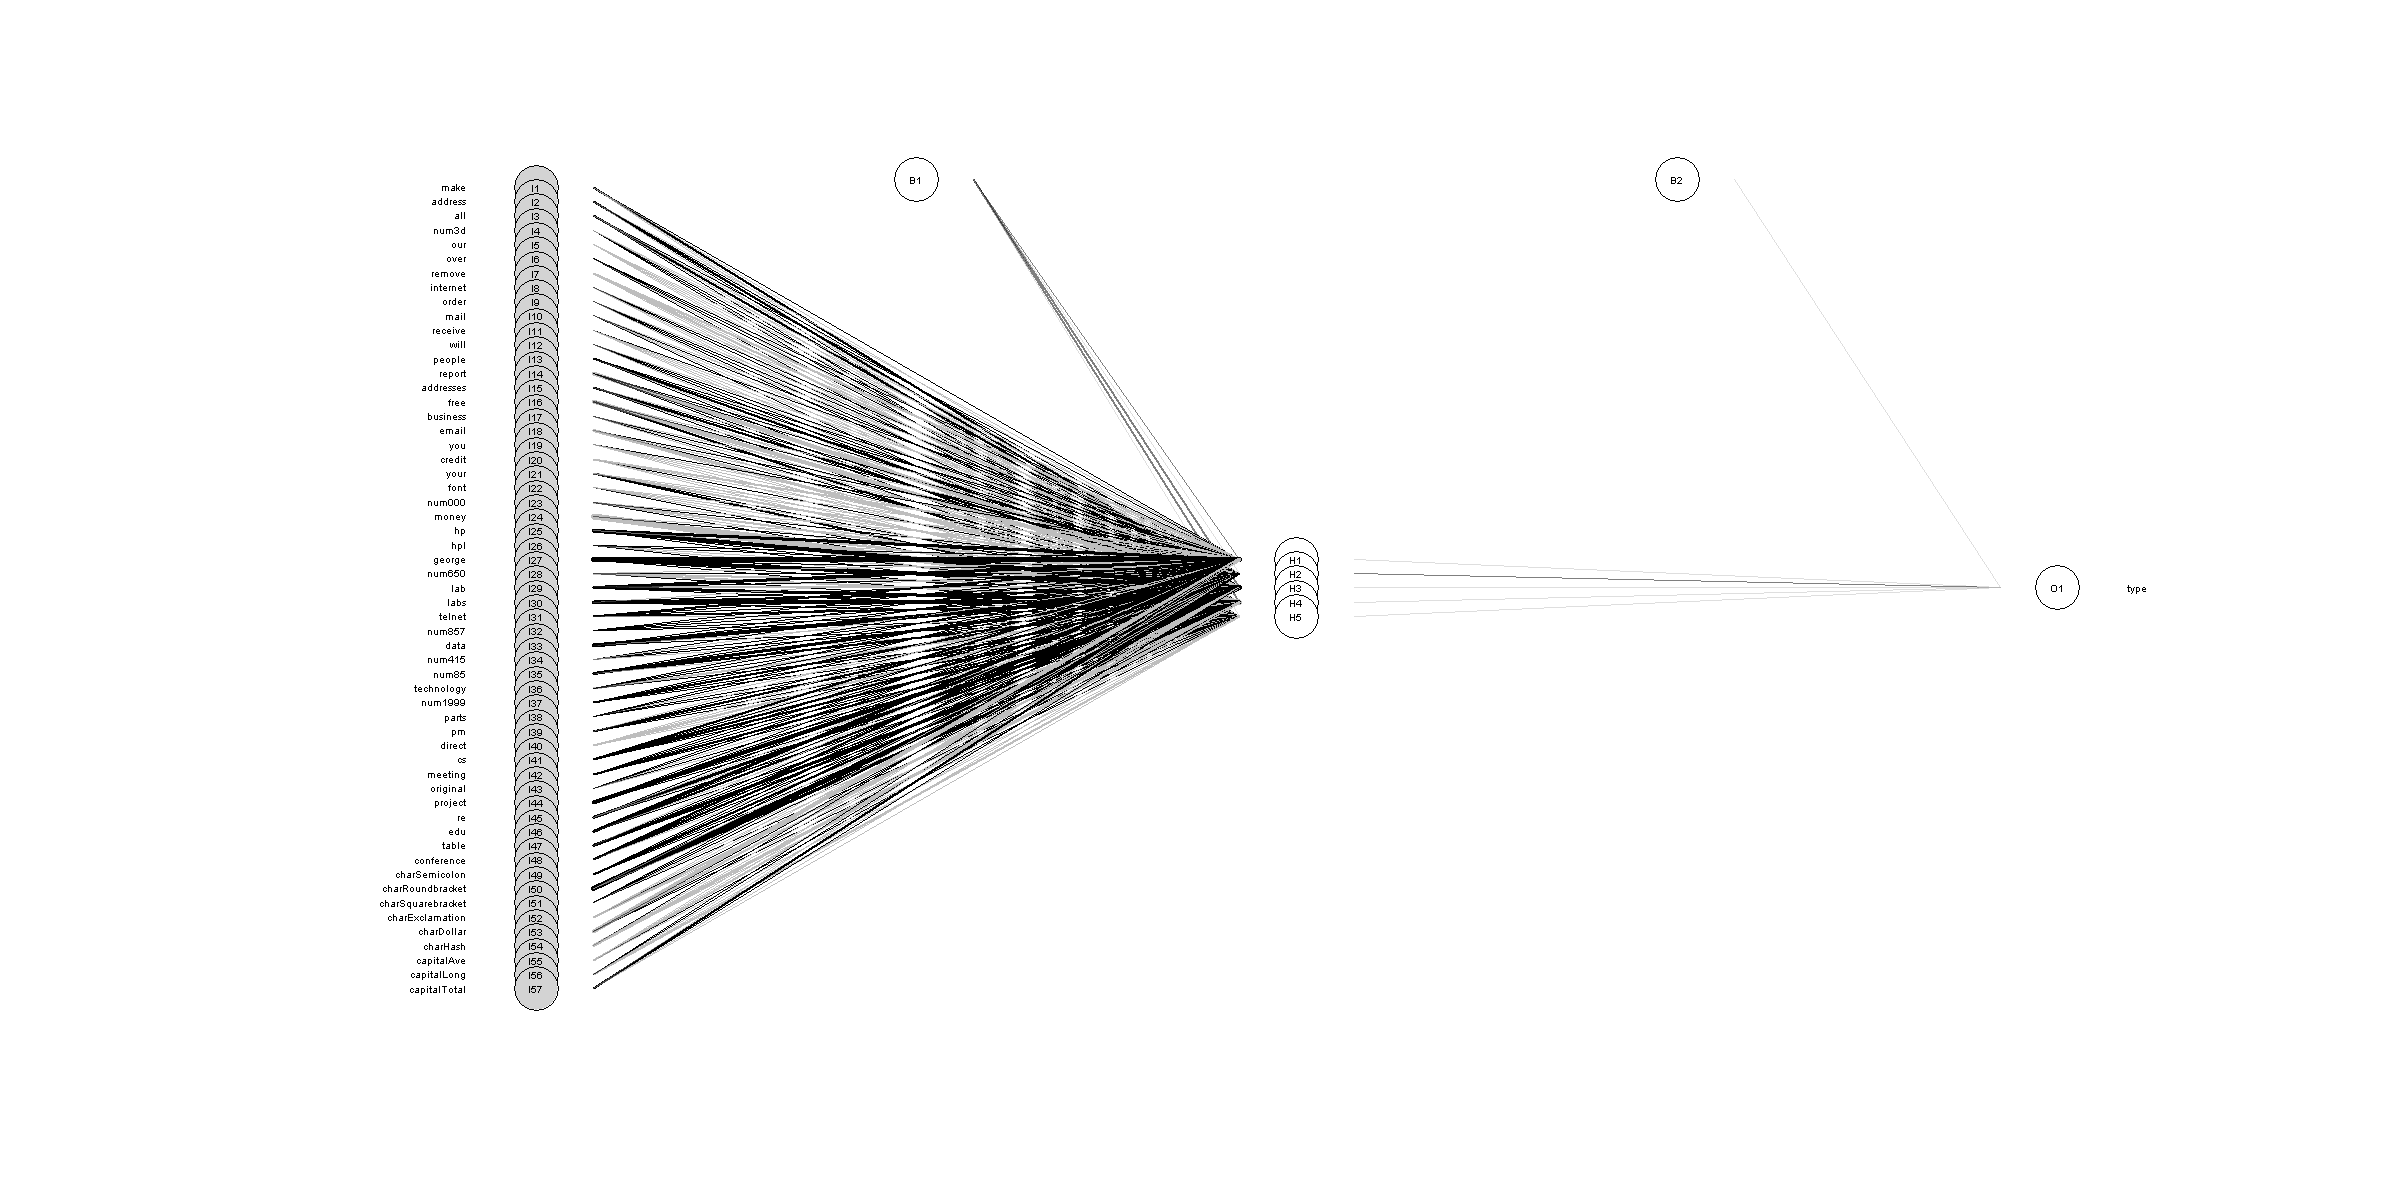

In [7]:
plot.nnet(model_single_out, alpha.val = 0.5, circle.col = list('lightgray', 'white'), bord.col = 'black', cex=0.5)

### MLP - One hot encoding network

In [8]:
model_one_hot<-nnet(x=train_data[,-target_variable],
               y=class.ind(as.factor(train_data[,target_variable])),
               size=hidden_nodes,
               skip=FALSE,
               trace=T, 
               maxit=200,
               rang=0.5)

model_one_hot

Y_pred<-predict(model_one_hot,test_data[,-target_variable])
Y_hat_one_hot <- ifelse(Y_pred[,2] > threshold,"spam","nonspam")

head(Y_pred)

# weights:  302
initial  value 1195.245839 
iter  10 value 840.046236
iter  20 value 592.847170
iter  30 value 569.837593
iter  40 value 294.467355
iter  50 value 219.316775
iter  60 value 180.436915
iter  70 value 168.422798
iter  80 value 165.732909
iter  90 value 159.270993
iter 100 value 153.152379
iter 110 value 146.819417
iter 120 value 138.725554
iter 130 value 134.684224
iter 140 value 133.575651
iter 150 value 132.515950
iter 160 value 132.301671
iter 170 value 132.242072
iter 180 value 132.227923
iter 190 value 132.218630
iter 200 value 132.208673
final  value 132.208673 
stopped after 200 iterations


a 57-5-2 network with 302 weights
options were -

,nonspam,spam
2019,1,0
855,0,1
2038,1,0
2195,1,0
1411,0,1
1971,1,0


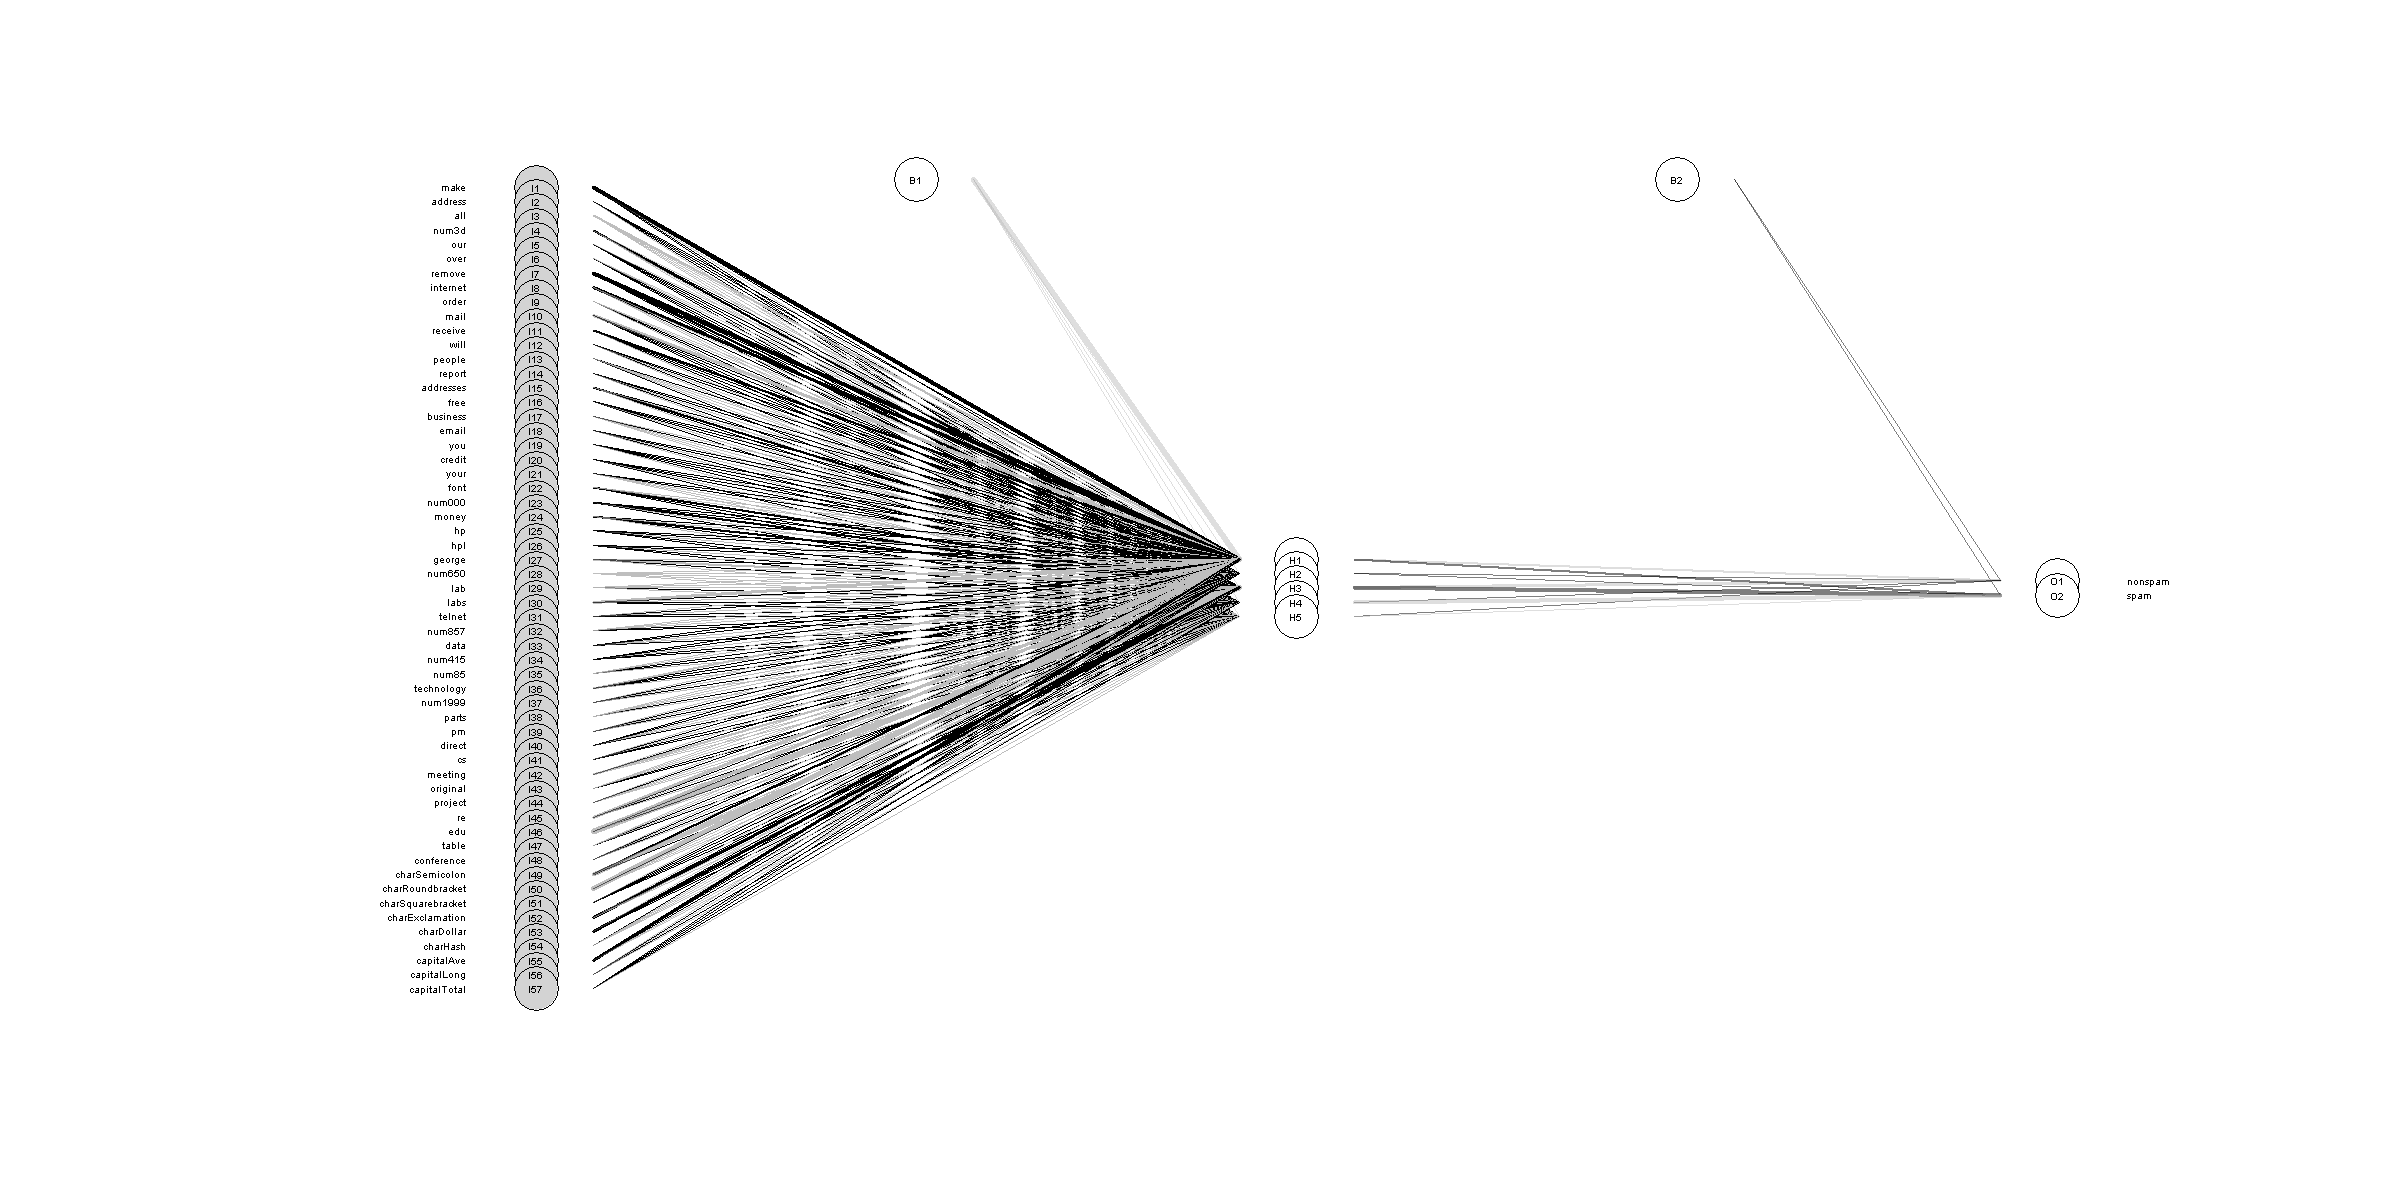

In [9]:
plot.nnet(model_one_hot, alpha.val = 0.5, circle.col = list('lightgray', 'white'), bord.col = 'black', cex=0.5)

In [10]:
Y <- test_data[,target_variable]

displayResults(Y,Y_hat_single_out,"Single out")
displayResults(Y,Y_hat_one_hot,"One hot")


[1] "[INFO] - Confusion matrix Single out :"
         Y
Y_hat     nonspam spam
  nonspam    1347  104
  spam         56  794
[1] "[INFO] - Misclassification rate Single out : 0.069534984789222"


[1] 0.930465

[1] "[INFO] - Confusion matrix One hot :"
         Y
Y_hat     nonspam spam
  nonspam    1345   98
  spam         58  800
[1] "[INFO] - Misclassification rate One hot : 0.0677966101694916"


[1] 0.9322034

### Questions
- Does the type of encoding affect the quality of the classifiers?
- What does the $B_i$ nodes represent?
- Does the number of hidden neurons affect the quality of the prediction?
- If so, how?

## k-fold crossvalidation

As the convergence of neural networks is highly influenced by the initial choice of weights, togheter with the choice of the optimization algorithm, it will be interesting to how the choice of these parameters will influence the performances of the model.  

In order to do so, we ask you to implement $k$-fold cross validation and to compare:

- In-sample error
- Out-of-sample error
- Crossvalidation error

for a varying number of hidden nodes $\in \{3,5,10,15,20\}$.

## Bagging Neural Networks

Given a standard training set $D$ of size $n$, bagging generates $m$ new training sets $D_i$, each of size $n′$, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_{i}$
Bagging leads to "improvements for unstable procedures" (Breiman, 1996), which include, for example, artificial neural networks, classification and regression trees. On the other hand, it can mildly degrade the performance of stable methods such as K-nearest neighbors (Breiman, 1996).

We would like to study the impact of bagging on the problem at hand.
In order to do so you have to:

- Develop a basic (50/50 split) neural network model
- Develop a bagged version of the same model
- Compare (through tables and/or plots) the perfomances of the models